In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import os

import tensorflow as tf

# Intro to Regression with TF

In [2]:
print(tf.__version__)

2.15.0


# Creating data to view and fit


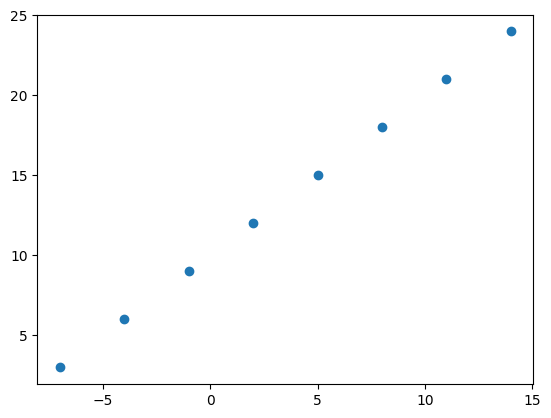

In [3]:
# Create Features
X = np.array([-7.0, -4.0,-1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create Labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output shapes

In [5]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [7]:
X[0].ndim, y[0].ndim

(0, 0)

In [8]:
# turn our numpy array to tensors
X = tf.constant(X)
y = tf.constant(y)

X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

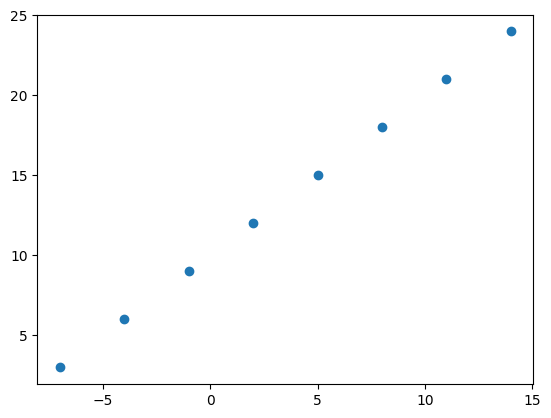

In [10]:
plt.scatter(X, y)

# Steps in modelling with Tensorflow

In [11]:
# set the random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


# 2. Comple the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 12.5944 - mae: 12.5944
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 12.4619 - mae: 12.4619
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 12.3294 - mae: 12.3294
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 12.1969 - mae: 12.1969
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 12.0644 - mae: 12.0644


In [12]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [13]:
# Try and make predictions using the model
model.predict(X), model.predict([17.0])

1/1 [==============================] - 0s 57ms/step


(array([[-2.9862196 ],
        [-1.6849827 ],
        [-0.38374567],
        [ 0.9174913 ],
        [ 2.2187283 ],
        [ 3.5199652 ],
        [ 4.8212023 ],
        [ 6.1224394 ]], dtype=float32),
 array([[7.4236765]], dtype=float32))

# Improving our Model

* Creating a model -
  * here we might add more layers.
  * increase the number of hidden layers.
  * change the activation funtion of each layer.
* **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
* **Fitting a Model** - Fit the model for more **epochs** or on **more data**.

In [14]:
## Rebuild the model

# creat the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=['mae'])

# Fit the model ()
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 475ms/step - loss: 12.2191 - mae: 12.2191
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 12.0866 - mae: 12.0866
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 11.9541 - mae: 11.9541
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 11.8216 - mae: 11.8216
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 11.6891 - mae: 11.6891
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 11.5566 - mae: 11.5566
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 11.4241 - mae: 11.4241
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 11.2916 - mae: 11.2916
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 11.1591 - mae: 11.1591
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 11.0266 - mae: 11.0266
Epoch 11/100
1/1 [==============================

In [15]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [16]:
# let's chek the model predictino
model.predict([17.0])

1/1 [==============================] - 0s 54ms/step


array([[29.67631]], dtype=float32)

In [17]:
## Rebuild the model

# create model with extra dense layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 11.7601 - mae: 11.7601
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.0626 - mae: 11.0626
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 10.3523 - mae: 10.3523
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 9.6272 - mae: 9.6272
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 8.8852 - mae: 8.8852
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 8.1248 - mae: 8.1248
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 7.3443 - mae: 7.3443
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 6.9437 - mae: 6.9437
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 7.1886 - mae: 7.1886
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 7.4603 - mae: 7.4603
Epoch 11/100
1/1 [==============================] - 0s 14ms/step 

In [18]:
# predictions
model.predict([17.0])

1/1 [==============================] - 0s 60ms/step


array([[26.560223]], dtype=float32)

 # Evaluating a Model

 * Visualize the data
 * Visualize the model
 * Visualize the model training
 * Visualize the predictions

In [19]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)

# Create labels
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

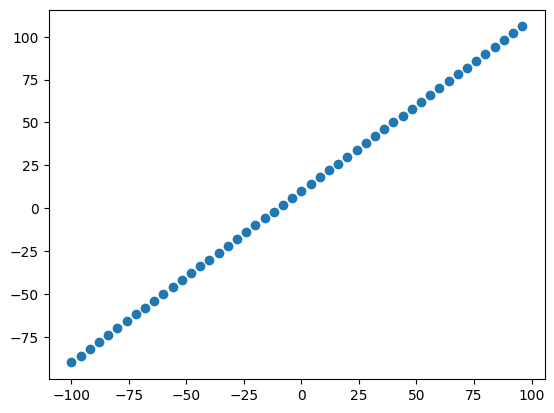

In [20]:
# visualize the dataset
plt.scatter(X,y)

In [21]:
from sklearn.model_selection import train_test_split

X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

## Visualize the data

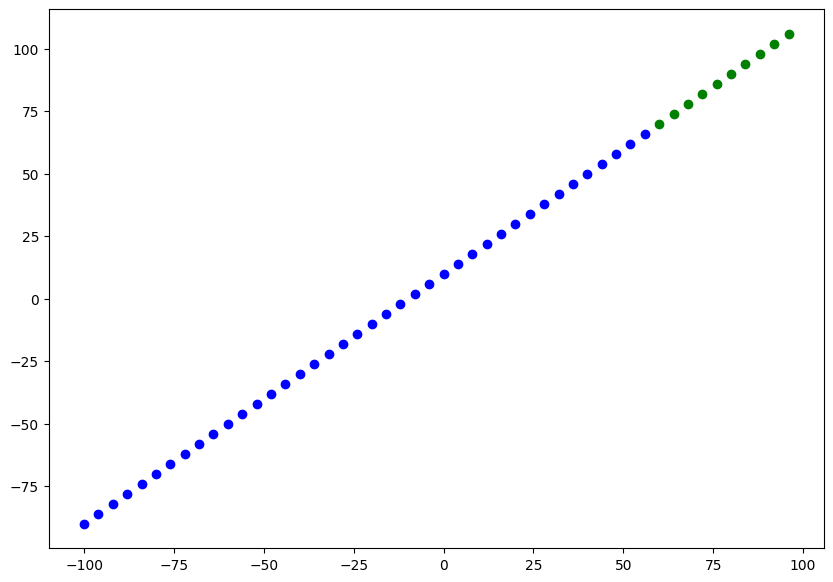

In [22]:
plt.figure(figsize=(10,7))

plt.scatter(X_train, y_train, c="b", label="training data")
plt.scatter(X_test, y_test, c="g", label="testing data")

In [23]:
# Build model using this data

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [24]:
# model.summary() won't work until we fit/build the model

## Visualize the model (without fitting it)

In [25]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name = "model")


# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* total params - total number of parameters in the mdoel
* trainable params - these are the parameters (patterns) the model can update as it trains
(remember that when we use pre-built models, we will/may see different numbers of trainable and non-trainable params)
* non-trainable params - the params that are not updated during training. Happens during transfer learning.


In [27]:
 # fitting the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [28]:
# get the model summary

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


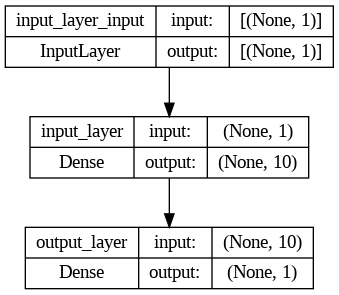

In [29]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### Visualizing Model Predictions

In [30]:
# make predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 50ms/step


array([[ 91.26591 ],
       [ 97.22563 ],
       [103.18536 ],
       [109.14509 ],
       [115.10482 ],
       [121.064545],
       [127.02427 ],
       [132.984   ],
       [138.94371 ],
       [144.90344 ]], dtype=float32)

In [31]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [32]:
# Plotting Function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels =y_test,
                     predictions = y_pred):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c="b", label="training data")
  plt.scatter(test_data, test_labels, c="g", label="testing data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend()

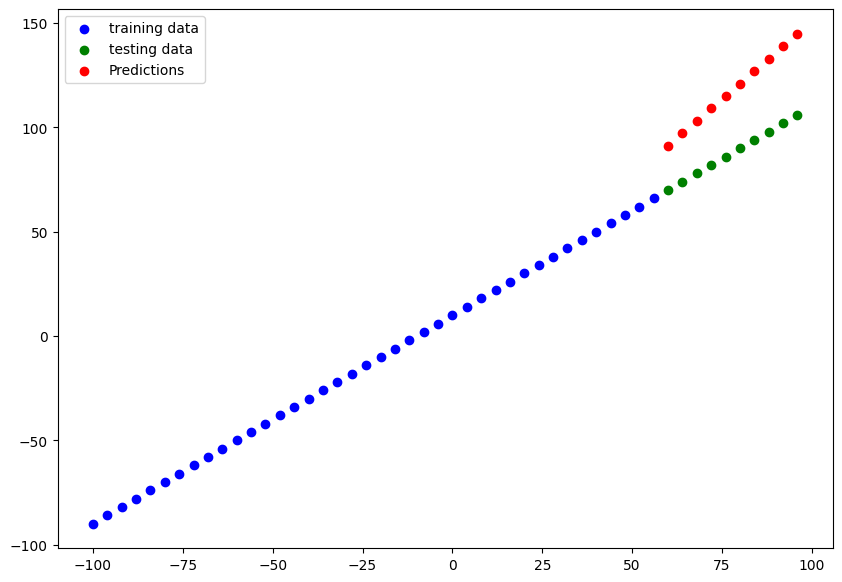

In [33]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

### Evaluating Model Predicitons with Regression Evaluation metrics
* mae
* mse
* mape
* R2

In [34]:
# Evaluate the model on the test (since we set metric as "mae",
# we get mae for both the data samples)
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 125ms/step - loss: 30.0847 - mae: 30.0847


[30.08467674255371, 30.08467674255371]

In [35]:
# Calaculate MAE
n = len(X_test)

mae = sum((X_test - y_test)^2)/n
mae

<tf.Tensor: shape=(), dtype=float64, numpy=-12.0>

In [36]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 91.26591 ],
       [ 97.22563 ],
       [103.18536 ],
       [109.14509 ],
       [115.10482 ],
       [121.064545],
       [127.02427 ],
       [132.984   ],
       [138.94371 ],
       [144.90344 ]], dtype=float32)>

In [37]:
# this is incorrect because even though we converted y_pred to tensor, its shape is different
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10.253181, 12.090253, 15.748291, 21.145088, 27.104822, 33.064545,
       39.02427 , 44.983994, 50.94371 , 56.903442], dtype=float32)>

In [38]:
# change the shape of y_pred
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 91.26591 ,  97.22563 , 103.18536 , 109.14509 , 115.10482 ,
       121.064545, 127.02427 , 132.984   , 138.94371 , 144.90344 ],
      dtype=float32)>

In [39]:
# calculate mae
mae = tf.metrics.mean_absolute_error(y_test,
                                     y_pred = tf.squeeze(y_pred))

mae

<tf.Tensor: shape=(), dtype=float32, numpy=30.084677>

In [40]:
# calculate the mse
mse = tf.metrics.mean_squared_error(y_test,
                                    y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=936.7721>

In [43]:
# make functions to reuse mae and mse
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = X_test,
                                        y_pred = tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true,
                                       y_pred = tf.squeeze(y_pred))

# Running Experiments to Improve Our Model

How to get better model performance
- Get more data
- Make your model larger
- Train for longer


We will run 3 experiments
- `model 1` - same as original model, 1 layer, trained for 100 epochs
- `model 2` - 2 layers, trained for 100 epochs
- `model 3` - 2 layers, trained for 500 epochs

In [46]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

## Build Model 1

In [58]:
# set the random seed
tf.random.set_seed(23)

# 1. create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])



# 2. Compile the model
model_1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 29ms/step - loss: 80.6711 - mae: 80.6711
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 44.8254 - mae: 44.8254
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 12.8335 - mae: 12.8335
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 13.2414 - mae: 13.2414
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 17.5015 - mae: 17.5015
Epoch 6/100
2/2 [==============================] - 0s 13ms/step - loss: 11.0722 - mae: 11.0722
Epoch 7/100
2/2 [==============================] - 0s 13ms/step - loss: 15.2960 - mae: 15.2960
Epoch 8/100
2/2 [==============================] - 0s 16ms/step - loss: 9.5175 - mae: 9.5175
Epoch 9/100
2/2 [==============================] - 0s 13ms/step - loss: 9.0077 - mae: 9.0077
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 11.2606 - mae: 11.2606
Epoch 11/100
2/2 [==============================] - 0

1/1 [==============================] - 0s 39ms/step


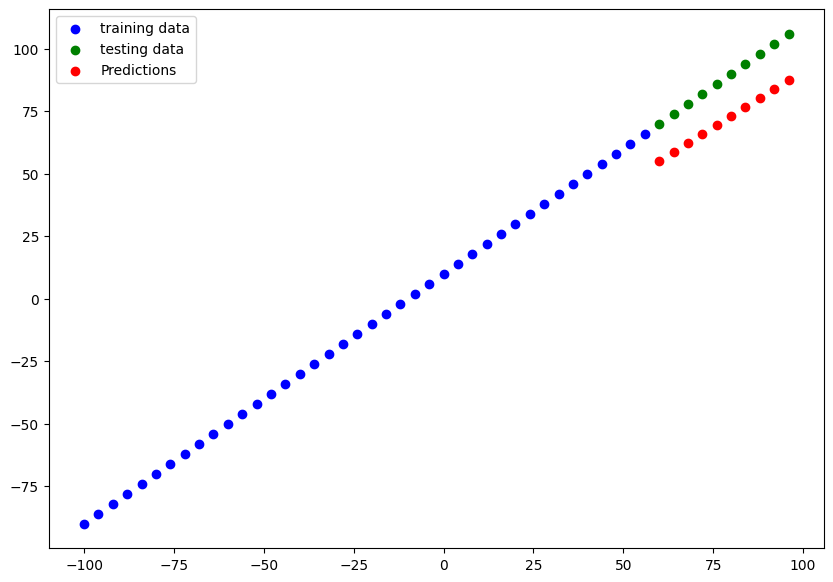

In [59]:
# make and plot predictions with model_1

y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [60]:
# calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=6.6113157>,
 <tf.Tensor: shape=(), dtype=float32, numpy=277.29443>)

## Build Model 2

In [72]:
tf.random.set_seed(23)

# create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# compile the model
model_2.compile(loss =tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1),
            y_train,
            epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 63.2697 - mae: 63.2697
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 18.2195 - mae: 18.2195
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 13.1007 - mae: 13.1007
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 29.0851 - mae: 29.0851
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 15.1692 - mae: 15.1692
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 21.3273 - mae: 21.3273
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 16.3932 - mae: 16.3932
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 16.1558 - mae: 16.1558
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 9.5814 - mae: 9.5814
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 13.5550 - mae: 13.5550
Epoch 11/100
2/2 [==============================] - 0s 7ms/

1/1 [==============================] - 0s 77ms/step


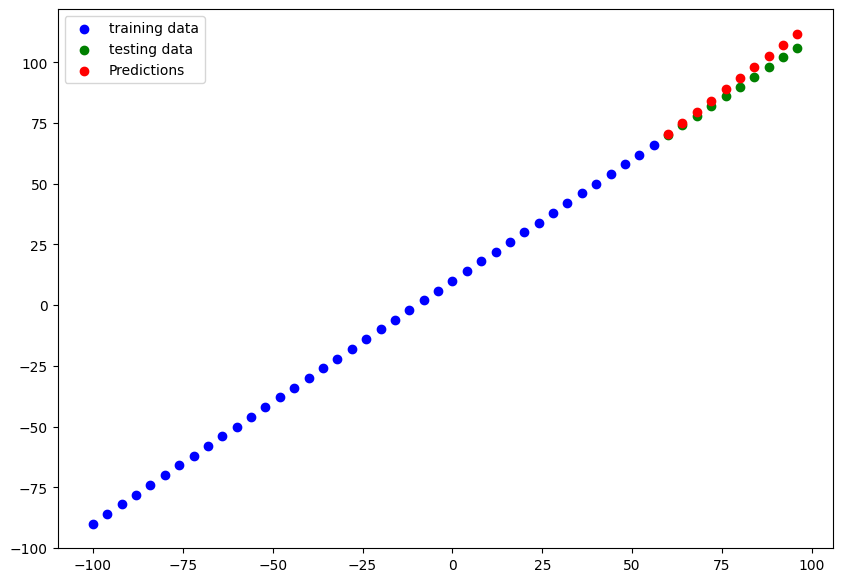

In [73]:
# make and plot predictions for model_2

y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions = y_preds_2)

In [75]:
# calculate model_2 evaluate metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.134158>,
 <tf.Tensor: shape=(), dtype=float32, numpy=12.589118>)

## Model 3

In [83]:
# set the random see
tf.random.set_seed(42)


# create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
    ])

# compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

# fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1),
            y_train,
            epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 15ms/step - loss: 73.8138 - mae: 73.8138
Epoch 2/500
2/2 [==============================] - 0s 11ms/step - loss: 12.9060 - mae: 12.9060
Epoch 3/500
2/2 [==============================] - 0s 10ms/step - loss: 41.6959 - mae: 41.6959
Epoch 4/500
2/2 [==============================] - 0s 10ms/step - loss: 19.9707 - mae: 19.9707
Epoch 5/500
2/2 [==============================] - 0s 10ms/step - loss: 15.4523 - mae: 15.4523
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 12.3250 - mae: 12.3250
Epoch 7/500
2/2 [==============================] - 0s 9ms/step - loss: 13.9247 - mae: 13.9247
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 13.2114 - mae: 13.2114
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 35.1624 - mae: 35.1624
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 24.4871 - mae: 24.4871
Epoch 11/500
2/2 [==============================] - 0s

1/1 [==============================] - 0s 178ms/step


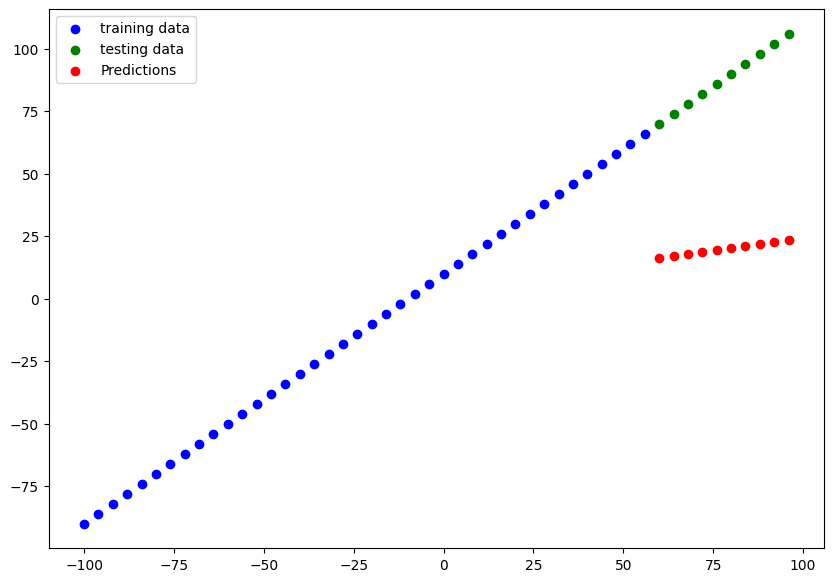

In [84]:
# make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [85]:
# calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=58.209618>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4737.422>)

# Comparing the Results of our Experiments

In [87]:
# comparing model results with pandas dataframe

import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,6.611316,277.294434
1,model_2,13.134158,12.589118
2,model_3,58.209618,4737.421875


In [89]:
# Model 2 performed the best

model_2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 1)                 2         
                                                                 
 dense_21 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Trackig your Experiments

One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).

📖 Resource: But as you build more models, you'll want to look into using tools such as:

- **TensorBoard** - a component of the TensorFlow library to help track modelling experiments (we'll see this later).

- **Weights & Biases** - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

# Saving Models

Once we've trained a model and found one which performs to your liking, we'll probably want to save it for use elsewhere (like a web application or mobile device).

We can save a TensorFlow/Keras model using model.save().

There are two ways to save a model in TensorFlow:

- The **SavedModel** format (default).
- The **HDF5** format.

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [91]:
# save Model using the SavedModel format
model_2.save("best_model_SavedModel_format")

In [92]:
# save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Loading a Saved Model
We can load a saved model using the load_model() method.

Loading a model for the different formats (SavedModel and HDF5) is the same (as long as the pathnames to the particular formats are correct).

In [93]:
# load in saved model format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 1)                 2         
                                                                 
 dense_21 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [94]:
# recheck original model_2 summary to confirm model architecture
model_2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 1)                 2         
                                                                 
 dense_21 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [96]:
# Compare Model_2 predictions with SavedModel format model predictions

model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)

model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 69ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# Loading a HDF5 model

In [97]:
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 1)                 2         
                                                                 
 dense_21 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:
# Compare Model_2 predictions with SavedModel format model predictions

model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)

model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 43ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# Download Files from COlab

In [99]:
# Download the h5 model

from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [100]:
# import the SavedMOdel Folder

from google.colab import files
import shutil

shutil.make_archive('saved_model_archive',
                    'zip',
                    'best_model_SavedModel_format')

# download the zip files
files.download('saved_model_archive.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>